In [1]:
import sqlite3
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from urllib.request import urlopen
from json import load
sns.set_style('white')
sns.set_context('notebook')

# 1. Import Data

In [2]:
# ASC Cohort
conn = sqlite3.connect('./Data/knwlg_blf.db')
dat1 = pd.read_sql("SELECT * FROM trials A INNER JOIN subjects B ON A.prolific_id = B.prolific_id "
                   "WHERE B.block1_complete=TRUE "
                   "AND B.block2_complete=TRUE "
                   "AND B.block3_complete=TRUE "
                   "AND B.completion_code LIKE '%XXX%'", con=conn)
dat1 = dat1.loc[:,~dat1.columns.duplicated()].copy() # prolific id from both tables will be in df, remove duplicate
# REMOVE DISTRACTORS
dat1 = dat1.loc[dat1.trial_type == 'test'].reset_index(drop=True)
dat1['group'] = 'Autism'

# TD cohort
conn2 = sqlite3.connect('./Data/knwlg_blf_controls.db')
dat2 = pd.read_sql('SELECT * FROM trials A INNER JOIN subjects B ON A.prolific_id = B.prolific_id WHERE B.completion_code="548DA3BD"', con=conn2)
dat2 = dat2.loc[:,~dat2.columns.duplicated()].copy() # prolific id from both tables will be in df, remove duplicate
# REMOVE DISTRACTORS
dat2 = dat2.loc[dat2.trial_type == 'test'].reset_index(drop=True)
dat2['email'] = 'N/A'
dat2['group'] = 'Neurotypical'

# Combine into one big dataframe
dat = pd.concat(objs=[dat1,dat2], ignore_index=True)
#
dat['email'] = dat.email.str.lower().str.strip()

# data saved for testing purposes has id as float instead of alphanumeric so only keep alphanumeric IDs
dat = dat[dat.prolific_id.str.isalnum()].reset_index(drop=True)
# remove rows without response.
dat = dat[~dat.response_key.isnull().values]
dat['response_key'] = dat.response_key.apply(literal_eval)

dat = dat[[xx == list for xx in [type(x) for x in dat.response_key]]].reset_index(drop=True)


# NOTE: after September 10th, 2022, completion of recaptcha saved to database.

In [8]:
conn = sqlite3.connect('./Data/knwlg_blf_asc.db')
dat1 = pd.read_sql("SELECT * FROM trials A INNER JOIN subjects B ON A.prolific_id = B.prolific_id "
                   "WHERE B.block1_complete=TRUE "
                   "AND B.block2_complete=TRUE "
                   "AND B.block3_complete=TRUE "
                   "AND B.completion_code LIKE '%XXX%'", con=conn)
dat1 = dat1.loc[:,~dat1.columns.duplicated()].copy() # prolific id from both tables will be in df, remove duplicate
# REMOVE DISTRACTORS
dat1 = dat1.loc[dat1.trial_type == 'test'].reset_index(drop=True)
dat1['group'] = 'Autism'
dat1['email'] = dat1.email.str.lower().str.strip()

# data saved for testing purposes has id as float instead of alphanumeric so only keep alphanumeric IDs
dat1 = dat1[dat.prolific_id.str.isalnum()].reset_index(drop=True)
# remove rows without response.
dat1 = dat1[~dat1.response_key.isnull().values]
dat1['response_key'] = dat1.response_key.apply(literal_eval)

dat1 = dat1[[xx == list for xx in [type(x) for x in dat1.response_key]]].reset_index(drop=True)



<ipython-input-8-75434e5563ae>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dat1 = dat1[dat.prolific_id.str.isalnum()].reset_index(drop=True)


In [17]:
dat.email.sort_values( axis=0).unique()#[176]
dat.loc[dat.email == dat.email.sort_values( axis=0).unique()[283]]

,id,trial_num,correct,trial_type,scenario,belief_type,ascription_type,correct_answer,target_onset,response_onset,...,GMT_timestamp,email,block1_complete,block2_complete,block3_complete,completion_code,feedback,completion_time,recaptcha_complete,group
4836,12865,1,0.0,test,3,IG,Knows,f,2022-09-10 13:58:41.086000,2022-09-10 13:58:46.184000,...,2022-09-10 17:54:26.022730,nathanielbest438@gmail.com,1,1,1,XXXX,,2022-09-10 14:22:25.987487,NaN,Autism
4837,12866,2,0.0,test,8,IG,Knows,f,2022-09-10 13:59:10.906000,2022-09-10 13:59:12.279000,...,2022-09-10 17:54:26.022730,nathanielbest438@gmail.com,1,1,1,XXXX,,2022-09-10 14:22:25.987487,NaN,Autism
4838,12870,6,0.0,test,5,FB,Thinks,f,2022-09-10 14:01:03.696000,2022-09-10 14:01:05.580000,...,2022-09-10 17:54:26.022730,nathanielbest438@gmail.com,1,1,1,XXXX,,2022-09-10 14:22:25.987487,NaN,Autism
4839,12871,7,0.0,test,11,TB,Knows,j,2022-09-10 14:01:30.362000,2022-09-10 14:01:37.768000,...,2022-09-10 17:54:26.022730,nathanielbest438@gmail.com,1,1,1,XXXX,,2022-09-10 14:22:25.987487,NaN,Autism
4840,12874,10,1.0,test,9,IG,Thinks,f,2022-09-10 14:03:02.459000,2022-09-10 14:03:09.035000,...,2022-09-10 17:54:26.022730,nathanielbest438@gmail.com,1,1,1,XXXX,,2022-09-10 14:22:25.987487,NaN,Autism
4841,12875,11,1.0,test,1,TB,Knows,j,2022-09-10 14:03:37.207000,2022-09-10 14:03:38.737000,...,2022-09-10 17:54:26.022730,nathanielbest438@gmail.com,1,1,1,XXXX,,2022-09-10 14:22:25.987487,NaN,Autism
4842,12876,12,0.0,test,10,TB,Thinks,j,2022-09-10 14:04:04.334000,2022-09-10 14:04:09.433000,...,2022-09-10 17:54:26.022730,nathanielbest438@gmail.com,1,1,1,XXXX,,2022-09-10 14:22:25.987487,NaN,Autism
4843,12878,14,0.0,test,4,FB,Thinks,f,2022-09-10 14:05:04.674000,2022-09-10 14:05:05.647000,...,2022-09-10 17:54:26.022730,nathanielbest438@gmail.com,1,1,1,XXXX,,2022-09-10 14:22:25.987487,NaN,Autism
4844,12881,17,1.0,test,12,TB,Thinks,j,2022-09-10 14:06:47.282000,2022-09-10 14:06:48.839000,...,2022-09-10 17:54:26.022730,nathanielbest438@gmail.com,1,1,1,XXXX,,2022-09-10 14:22:25.987487,NaN,Autism
4845,12883,19,0.0,test,7,FB,Knows,f,2022-09-10 14:07:37.211000,2022-09-10 14:07:38.600000,...,2022-09-10 17:54:26.022730,nathanielbest438@gmail.com,1,1,1,XXXX,,2022-09-10 14:22:25.987487,NaN,Autism


In [10]:
dat1.loc[dat1.email == 'jasminelaura477@gmail.com']#.correct.mean()
dat1.email.sort_values( axis=0).unique()

array(['adam.walker9851@gmail.com', 'adedoyinbolaji53@gmail.com',
       'akanmuolamilekan3@gmail.com', 'akoredeusman507@gmail.com',
       'alamuaremu5@gmail.com', 'albertoschloss05@gmail.com',
       'alexanderrrthomass@outlook.com', 'alexcourtney094@gmail.com',
       'alicehepnerwagner@gmail.com', 'alonnamartins123@gmail.com',
       'ameliadavis805@gmail.com', 'andrewallen734@gmail.com',
       'andrewson440@gmail.com', 'animashaunmary8@gmail.com',
       'animashaunyemisi90@gmail.com', 'anthonyslessor7@gmail.com',
       'antonionova757@gmail.com', 'anuola565@gmail.com',
       'ar1722994@gmail.com', 'asherothfans@gmail.com',
       'audeng2022@gmail.com', 'austinhill113@gmail.com',
       'babedowns68@gmail.com', 'barryspielman5@gmail.com',
       'bdele224@gamil.com', 'benjamincharlotte22@gmail.com',
       'betsmi07@gmail.com', 'bliksjark@gmail.com', 'bloomkeri@gmail.com',
       'borgsbeto@gmail.com', 'bpharris141111@gmail.com',
       'braindillan@gmail.com', 'brightphillips

## Cleaning

## Convert SQL strings to python datetime object and compute timedeltas

In [3]:
def convert_time(x):
    if type(x) == str:
        return datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')

dat[['response_onset','target_onset','participation_date','completion_time']] = dat[['response_onset','target_onset','participation_date','completion_time']].applymap(convert_time)

dat['rt'] = dat.apply(lambda row: row['response_onset'] - row['target_onset'], axis=1)
dat['rt_ms'] = dat.apply(lambda row: int(round(row['rt'].total_seconds() * 1e3)), axis=1)

## Time to Complete

In [4]:
idx = dat[~dat.completion_time.isnull()].index # find the indices with completion time variable
dat['study_duration'] = None
dat.loc[idx, 'study_duration'] = dat.loc[idx].completion_time - dat.loc[idx].participation_date
#dat.loc[idx].groupby('prolific_id').mean()

# 2. Accuracy

### Note where subjects entered invalid responses

In [5]:
accepted_answers = ['f', 'j', '999']
dat['accepted_answer'] = None
for i, response in enumerate(dat.response_key):
    if sum([key.lower() in accepted_answers for key in response]) >= 1:  # == len(response):
        dat.loc[i, 'accepted_answer'] = True
    else:
        dat.loc[i, 'accepted_answer'] = False

print(f"{len(dat.loc[dat.accepted_answer == False].prolific_id.unique())} participants responded at least one trial with invalid keys. \n"
      f"{len(dat.loc[(dat.accepted_answer == False)&(dat.group == 'Neurotypical')].prolific_id.unique())} of these are from the neurotypical group. \n"
      f" {len(dat.loc[(dat.accepted_answer == False)&(dat.group == 'Autism')].prolific_id.unique())} of these are from the autism group.")

103 participants responded at least one trial with invalid keys. 
16 of these are from the neurotypical group. 
 87 of these are from the autism group.


In [8]:
dat.loc[dat.accepted_answer == False]

,id,trial_num,correct,trial_type,scenario,belief_type,ascription_type,correct_answer,target_onset,response_onset,...,block3_complete,completion_code,feedback,completion_time,recaptcha_complete,group,rt,rt_ms,study_duration,accepted_answer
34,407,23,0.0,test,8,FB,Knows,f,2022-08-31 05:20:24.839,2022-08-31 05:20:26.059,...,1,XXXY,no,NaT,NaN,Autism,0 days 00:00:01.220000,1220,None,False
109,555,3,0.0,test,9,IG,Thinks,f,2022-08-31 05:37:37.077,2022-08-31 05:37:38.528,...,1,XXXY,No,NaT,NaN,Autism,0 days 00:00:01.451000,1451,None,False
110,556,4,0.0,test,7,IG,Knows,f,2022-08-31 05:38:01.555,2022-08-31 05:38:01.972,...,1,XXXY,No,NaT,NaN,Autism,0 days 00:00:00.417000,417,None,False
386,1228,4,0.0,test,12,IG,Knows,f,2022-08-31 06:47:34.978,2022-08-31 06:47:36.946,...,1,XXXY,Great,NaT,NaN,Autism,0 days 00:00:01.968000,1968,None,False
427,1311,15,0.0,test,4,IG,Knows,f,2022-08-31 07:00:09.811,2022-08-31 07:00:10.586,...,1,XXXY,A good game with nice strategy,NaT,NaN,Autism,0 days 00:00:00.775000,775,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10108,11316,12,0.0,test,1,IG,Knows,f,2022-06-22 20:17:18.405,2022-06-22 20:17:20.979,...,1,548DA3BD,"I judged the ""relative disconnect,"" fact-wise,...",NaT,NaN,Neurotypical,0 days 00:00:02.574000,2574,None,False
10203,11507,11,0.0,test,4,FB,Thinks,f,2022-06-22 20:31:08.590,2022-06-22 20:31:09.064,...,1,548DA3BD,Good study,NaT,NaN,Neurotypical,0 days 00:00:00.474000,474,None,False
10436,12040,16,0.0,test,6,TB,Thinks,j,2022-06-22 20:33:17.452,2022-06-22 20:33:19.982,...,1,548DA3BD,,NaT,NaN,Neurotypical,0 days 00:00:02.530000,2530,None,False
10845,12931,19,0.0,test,7,FB,Thinks,f,2022-06-22 20:46:37.428,2022-06-22 20:46:37.522,...,1,548DA3BD,,NaT,NaN,Neurotypical,0 days 00:00:00.094000,94,None,False


### Note trials where subjects timed-out after the 5-seconds

In [6]:
dat['timeout'] = False
# Here are timeouts without a response at all
dat.loc[dat.apply(lambda row: '999' in row['response_key'], axis=1), 'timeout'] = True
# Here is where pps pressed a key after 5 seconds, but before the experiment redirected
timeouts = dat.loc[(dat.response_key.apply(len)>1) & (dat.apply(lambda row: '999' in row['response_key'], axis=1))].index
dat.loc[timeouts, 'timeout'] = True

print(f"{len(dat.loc[dat.timeout == True].prolific_id.unique())} participants timed out during at least one trial. \n"
      f"{len(dat.loc[(dat.timeout == True)&(dat.group == 'Neurotypical')].prolific_id.unique())} of these are from the neurotypical group. \n"
      f" {len(dat.loc[(dat.timeout == True)&(dat.group == 'Autism')].prolific_id.unique())} of these are from the autism group.")

557 participants timed out during at least one trial. 
176 of these are from the neurotypical group. 
 381 of these are from the autism group.


In [7]:
# If subjects hit more than one key, use only the last one
dat['full_response'] = dat['response_key']
dat['response_key'] = [resp[-1].lower() for resp in dat.response_key]

In [8]:
#  correct answers
dat.loc[dat.belief_type == 'TB', 'correct_answer'] = 'j'
dat.loc[dat.belief_type != 'TB', 'correct_answer'] = 'f'
# update correct column based on new answer key
dat['correct'] = dat.apply(lambda row: row['response_key'] == row['correct_answer'], axis=1)

# timeouts are considered incorrect
dat.loc[dat.timeout == True, 'correct'] = False

In [9]:
exmpl = dat.loc[(dat.timeout == True) & (dat.recaptcha_complete == True) & (dat.id==13062)].iloc[0]#[70]
t_on = exmpl.target_onset
#exmpl.full_response

ii = zip(exmpl.full_response, [x - t_on for x in eval(exmpl.keypress_time) ])
[x for x in ii]

[('999', Timedelta('0 days 00:00:05.096000')),
 ('j', Timedelta('0 days 00:00:05.114000'))]

In [9]:
dat.loc[(dat.timeout == True) & (~dat.keypress_time.isnull() )].apply(lambda row: [print(f'subject {row["prolific_id"]} on trial {row["trial_num"]}: responses: {x}')
                                                                                   for x in zip(row['full_response'], [ii - row['target_onset'] for ii in eval(row['keypress_time'])])], axis=1 )

subject pbMbDHTJIUpEAycZ on trial 11: responses: ('999', Timedelta('0 days 00:00:05.102000'))
subject pbMbDHTJIUpEAycZ on trial 11: responses: ('f', Timedelta('0 days 00:00:05.340000'))
subject pbMbDHTJIUpEAycZ on trial 12: responses: ('999', Timedelta('0 days 00:00:05.102000'))
subject pbMbDHTJIUpEAycZ on trial 16: responses: ('999', Timedelta('0 days 00:00:05.102000'))
subject pbMbDHTJIUpEAycZ on trial 16: responses: ('f', Timedelta('0 days 00:00:05.649000'))
subject pbMbDHTJIUpEAycZ on trial 18: responses: ('999', Timedelta('0 days 00:00:05.106000'))
subject pbMbDHTJIUpEAycZ on trial 18: responses: ('j', Timedelta('0 days 00:00:05.965000'))
subject pbMbDHTJIUpEAycZ on trial 23: responses: ('999', Timedelta('0 days 00:00:05.106000'))
subject pbMbDHTJIUpEAycZ on trial 23: responses: ('f', Timedelta('0 days 00:00:06.870000'))
subject pbMbDHTJIUpEAycZ on trial 24: responses: ('999', Timedelta('0 days 00:00:05.107000'))
subject svqkstwbSqyYTDqk on trial 6: responses: ('999', Timedelta('0

4912    [None, None]
4913          [None]
4914    [None, None]
4915    [None, None]
4918    [None, None]
            ...     
5166          [None]
5172    [None, None]
5173    [None, None]
5181          [None]
5182    [None, None]
Length: 99, dtype: object

In [10]:
exmpl = dat.loc[(dat.timeout == True) & (dat.recaptcha_complete == True) & (dat.id== 13360)].iloc[0]
t_on = exmpl.target_onset
#exmpl.full_response

ii = zip(exmpl.full_response, [x - t_on for x in eval(exmpl.keypress_time) ])
[x for x in ii]

[('j', Timedelta('0 days 00:00:04.496000')),
 ('999', Timedelta('0 days 00:00:05.091000'))]

In [55]:
dat.loc[(dat.timeout == True) & (dat.recaptcha_complete == True)]

,id,trial_num,correct,trial_type,scenario,belief_type,ascription_type,correct_answer,target_onset,response_onset,...,feedback,completion_time,recaptcha_complete,group,rt,rt_ms,study_duration,accepted_answer,timeout,full_response
4872,12962,2,False,test,5,FB,Thinks,f,2022-09-11 02:39:55.040,2022-09-11 02:40:00.136,...,"no. yes, I did. no technical problems",2022-09-11 03:17:21.284708,1.0,Autism,0 days 00:00:05.096000,5096,0 days 00:41:17.043491,True,True,"[f, 999]"
4874,12965,5,False,test,1,FB,Thinks,f,2022-09-11 02:42:49.205,2022-09-11 02:42:54.316,...,"no. yes, I did. no technical problems",2022-09-11 03:17:21.284708,1.0,Autism,0 days 00:00:05.111000,5111,0 days 00:41:17.043491,True,True,"[f, 999]"
4876,12967,7,False,test,4,FB,Knows,f,2022-09-11 02:43:50.589,2022-09-11 02:43:55.688,...,"no. yes, I did. no technical problems",2022-09-11 03:17:21.284708,1.0,Autism,0 days 00:00:05.099000,5099,0 days 00:41:17.043491,True,True,"[f, 999]"
4877,12970,10,False,test,9,IG,Thinks,f,2022-09-11 02:45:17.018,2022-09-11 02:45:22.123,...,"no. yes, I did. no technical problems",2022-09-11 03:17:21.284708,1.0,Autism,0 days 00:00:05.105000,5105,0 days 00:41:17.043491,True,True,"[j, 999]"
4880,12975,15,False,test,11,IG,Knows,f,2022-09-11 02:47:38.417,2022-09-11 02:47:43.527,...,"no. yes, I did. no technical problems",2022-09-11 03:17:21.284708,1.0,Autism,0 days 00:00:05.110000,5110,0 days 00:41:17.043491,True,True,"[f, 999]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,13314,18,False,test,3,FB,Knows,f,2022-09-13 00:34:51.013,2022-09-13 00:34:59.059,...,NO,2022-09-13 00:58:31.557231,1.0,Autism,0 days 00:00:08.046000,8046,0 days 00:43:02.917109,True,True,"[f, 999, f, f, f, f, f, f, f, f, f]"
5037,13339,19,False,test,8,FB,Knows,f,2022-09-13 02:07:55.666,2022-09-13 02:08:00.990,...,"the sentence in the two section are the same, ...",2022-09-13 02:38:47.422887,1.0,Autism,0 days 00:00:05.324000,5324,0 days 00:47:27.840451,True,True,"[999, j]"
5041,13350,6,False,test,9,IG,Thinks,f,2022-09-13 03:03:23.703,2022-09-13 03:03:28.814,...,a bit confusing,2022-09-13 03:35:51.735676,1.0,Autism,0 days 00:00:05.111000,5111,0 days 00:45:18.754434,True,True,[999]
5046,13360,16,False,test,6,TB,Knows,j,2022-09-13 03:09:02.144,2022-09-13 03:09:07.235,...,a bit confusing,2022-09-13 03:35:51.735676,1.0,Autism,0 days 00:00:05.091000,5091,0 days 00:45:18.754434,True,True,"[j, 999]"


In [54]:
exmpl.keypress_time

## Exclude participants with mean accuracy < .6

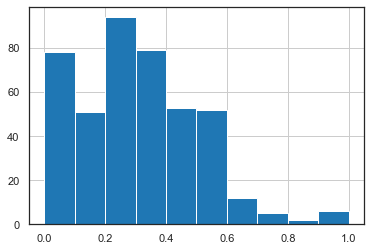

In [11]:
dat.loc[dat.group == 'Autism'].groupby('prolific_id').correct.mean().hist()

In [11]:
print(f'N autism cohort before exclusion: {len(dat.loc[dat.group == "Autism"].prolific_id.unique())}')
## Exclude participants with mean accuracy < .6
xx = dat.groupby('prolific_id').correct.mean() > .6
dat = dat.loc[dat.prolific_id.isin(xx[xx == True].index.tolist())]

N autism cohort before exclusion: 416


In [12]:
print(f'N autism cohort after exclusion: {len(dat.loc[dat.group == "Autism"].prolific_id.unique())}')

N autism cohort after exclusion: 19


In [ ]:
v_dat = dat#.loc[(dat.accepted_answer == True)]
acc = pd.DataFrame(columns=['cohort', 'agent_state', 'ascription', 'pct_correct', 'pct_incorrect'])
for gro in dat['group'].unique():
    for bel in dat.belief_type.unique():
        for ascrip in dat.ascription_type.unique():
            dd = v_dat.loc[(v_dat.group == gro)&(v_dat.belief_type==bel)&(v_dat.ascription_type==ascrip)]
            pc = len(dd.loc[dd.correct== True])/len(dd)
            ndf = pd.DataFrame({'cohort':[gro], 'agent_state':[bel], 'ascription':[ascrip], 'pct_correct':[pc], 'pct_incorrect':[1-pc]})
            acc = pd.concat([acc,ndf ], axis=0)#.reset_index(drop=True)
#sns.barplot(x='belief_type', row='group', x='ascription_type', hue='correct', kind='bar', data=)
#sns.histplot(data=v_dat, x='belief_type', hue='correct', multiple='stack', element='bars', stat='percent')

In [ ]:
import matplotlib.patches as mpatches
acc['total'] = 1
acc.melt(id_vars=['cohort', 'agent_state', 'ascription'], value_vars=['pct_correct', 'total'], value_name='Percent', var_name='Accuracy')
#sns.catplot(col='belief_type', row='group', x='correct', hue='ascription_type', kind='count', data=dat)
#dat.groupby('group').prolific_id.describe()
# bar chart 1 -> top bars (group of 'smoker=No')
#f, ax = plt.subplots(1, 2)
#bar1 = sns.barplot(x="agent_state",  y="total", hue='ascription', data=acc.loc[acc.cohort == 'Neurotypical'], color='darkblue', ax=ax[0])
#bar1a = sns.barplot(x="agent_state",  y="total", hue='ascription', data=acc.loc[acc.cohort == 'Autism'],  color='darkblue', ax=ax[1])

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
#bar2 = sns.barplot(x="agent_state",  y="pct_correct", hue='ascription', data=acc.loc[acc.cohort == 'Neurotypical'], color='darkblue', ax=ax[0])
#bar2a = sns.barplot(x="agent_state",  y="pct_correct", hue='ascription', data=acc.loc[acc.cohort == 'Autism'], color='darkblue', ax=ax[1])

bar2 = sns.catplot(x="agent_state", y="pct_correct", hue='ascription', data=acc,col='cohort', kind='bar')
# add legend


In [ ]:
total = v_dat.groupby(['belief_type', 'ascription_type'])['accepted_answer'].sum().reset_index()
correct = v_dat[v_dat.correct == True].groupby(['belief_type', 'ascription_type'])['accepted_answer'].sum().reset_index()

correct['pct'] = [i / j * 100 for i,j in zip(len(correct), len(total))]
total['pct'] = [i / j * 100 for i,j in zip(len(total), len(total))]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="belief_type",  y="pct", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="belief_type", y="pct", data=correct, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='incorrect')
bottom_bar = mpatches.Patch(color='lightblue', label='correct')
plt.legend(handles=[top_bar, bottom_bar])


In [ ]:
len(dat.loc[dat.group == 'Autism'].prolific_id.unique())

In [ ]:
len(dat.loc[dat.group == 'Autism'].prolific_id.unique())


In [ ]:
sns.catplot(col='belief_type', x='correct', hue='ascription_type', kind='count', data=dat)


## Check to make sure all responses came AFTER the target onset

In [ ]:
sum(dat.apply(lambda row: row['response_onset'] > row['target_onset'], axis=1)) == len(dat)


## Exclude subjects with mean RTs less than 1500ms or more than 4000ms

In [13]:
xx = dat.groupby('prolific_id').rt_ms.mean() < 1500
dat = dat.loc[dat.prolific_id.isin(xx[xx == False].index.tolist())]
yy = dat.groupby('prolific_id').rt_ms.mean() > 4000
dat = dat.loc[dat.prolific_id.isin(yy[yy == False].index.tolist())]

for old, new in {'IG': 'Ignorance', 'TB': 'True Info', 'FB': 'False Info'}.items():
    dat.belief_type.replace(old, new, inplace=True)

# 3. Location

In [12]:
adat = dat.loc[dat.group == 'Autism']
adat[['city', 'region', 'country', 'loc', 'org', 'postal', 'timezone']] = None
baddies = []
for subj in adat.prolific_id.unique():
    addr = adat.loc[adat.prolific_id == subj, 'ip_addy'].values[0]
    url = 'https://ipinfo.io/' + addr + '/json'
    res = urlopen(url)
    #response from url(if res==None then check connection)
    data = load(res)
    try:
        adat.loc[adat.prolific_id == subj, ['city', 'region', 'country', 'loc', 'org', 'postal', 'timezone', 'email', 'participation_date', 'study_duration']] = [data['city'], data['region'], data['country'], data['loc'], data['org'], data['postal'], data['timezone'], adat.loc[adat.prolific_id == subj, 'email'].values[0], adat.loc[adat.prolific_id == subj, 'participation_date'].values[0], adat.loc[adat.prolific_id == subj, 'study_duration'].values[0]]
    except:
        baddies.append(subj)
        print(f'issue with id: {subj}')

<ipython-input-12-f7d7ae70b66c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adat[['city', 'region', 'country', 'loc', 'org', 'postal', 'timezone']] = None
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1700: SettingWithCopyWarning: 
A value is trying to 

issue with id: hkaDfNtDY7Vic6Q2
issue with id: KcsjMENf2Rb52asn
issue with id: QFgA4FniYFQUJiLD
issue with id: cd1W9YvW5FmGdjut
issue with id: skxn7ToatEqrJCMk
issue with id: fAq7JhFiusgsyHBu
issue with id: FVPK1H8ewC2Sn9I8
issue with id: e6tEjiFq6RJhAeda
issue with id: 03Tn02ZnXIdPCKpV
issue with id: ZqMVfp7iexWMp6ae


In [13]:

for baddi in baddies:
    bd = dat.loc[dat.prolific_id == baddi]
    addr = adat.loc[adat.prolific_id == baddi, 'ip_addy'].values[0]
    url = 'https://ipinfo.io/' + addr + '/json'
    res = urlopen(url)
#response from url(if res==None then check connection)
    data = load(res)
    print(f'This person is from {data["country"]} the email: {adat.loc[adat.prolific_id == baddi, "email"].values[0]}, ip : {addr}')

This person is from NG the email: dennisfrank0634@gmail.com, ip : 102.89.34.73
This person is from NG the email: bjoe33320@gmail.com, ip : 102.89.40.49
This person is from NG the email: thomasrheott@gmail.com, ip : 102.89.32.16
This person is from NG the email: morning4447star@gmail.com, ip : 102.89.34.93
This person is from NG the email: washington111dc@gmail.com, ip : 102.89.32.56
This person is from NG the email: the90brainz@gmail.com, ip : 102.89.38.100
This person is from NG the email: marvinsjames589@gmail.com, ip : 102.89.41.212
This person is from NG the email: jasminefranklin059@gmail.com, ip : 102.89.34.252
This person is from NG the email: lovemary4240@gmail.com, ip : 102.89.43.174
This person is from NG the email: floraflora4240@gmail.com, ip : 102.89.43.174


In [14]:
data[]

{'ip': '102.89.43.174',
 'city': 'Lagos',
 'region': 'Lagos',
 'country': 'NG',
 'loc': '6.4541,3.3947',
 'org': 'AS29465 MTN NIGERIA Communication limited',
 'timezone': 'Africa/Lagos',
 'readme': 'https://ipinfo.io/missingauth'}

In [13]:
xx = adat.groupby(['prolific_id','participation_date', 'email', 'ip_addy','study_duration', 'city', 'region', 'country', 'loc', 'org', 'postal', 'timezone']).correct.mean()#.sort_values('correct')
yy = xx.reset_index().sort_values('correct', axis=0)
#yy[[yy.correct >]]
yy.loc[yy.correct>=.6]#.email

,prolific_id,participation_date,email,ip_addy,study_duration,city,region,country,loc,org,postal,timezone,correct
74,BA5c5J3i4Yv4mLIs,2022-09-08 16:00:44.531673,celinekia905@gmail.com,212.102.60.150,0 days 12:34:56.495945,Miami,Florida,US,"25.7629,-80.1895",AS60068 Datacamp Limited,33131,America/New_York,0.600000
190,ZUbd7hPuRxhCbsYk,2022-09-10 06:03:06.477173,aiyanakaren657754@gmail.com,102.129.145.179,0 days 00:22:22.863652,Los Angeles,California,US,"34.0522,-118.2437",AS174 Cogent Communications,90009,America/Los_Angeles,0.666667
284,ojRZ1hEX6NkvzFR2,2022-09-08 07:53:26.880706,ladylondon38@gmail.com,198.7.56.244,0 days 00:25:20.510651,Washington,"Washington, D.C.",US,"38.8951,-77.0364","AS30633 Leaseweb USA, Inc.",20004,America/New_York,0.666667
281,oLy8v6Y1zTAoTCn5,2022-09-08 10:07:30.324559,soonwow041@gmail.com,149.57.16.179,0 days 00:29:17.908553,Wilmington,Delaware,US,"39.7460,-75.5466",AS212238 Datacamp Limited,19801,America/New_York,0.666667
17,2aZodwMbhF8tN7b5,2022-09-10 11:30:02.101131,cocoroddy94@gmail.com,167.248.70.170,0 days 00:23:35.919900,Lincoln,Nebraska,US,"40.7848,-96.6431",AS15108 Allo Communications LLC,68506,America/Chicago,0.666667
228,faVIdQmxQ81l7IL3,2022-09-14 03:38:52.526758,deshawnmoon6@gmail.com,45.149.173.203,0 days 01:09:26.902266,Los Angeles,California,US,"34.0614,-118.2385",AS62240 Clouvider,90012,America/Los_Angeles,0.666667
277,nOZk6cnVMzsMFYwd,2022-09-09 14:22:21.331055,oluwaseuneuro@gmail.com,156.146.38.140,0 days 00:52:27.922351,Dallas,Texas,US,"32.7831,-96.8067",AS60068 Datacamp Limited,75201,America/Chicago,0.666667
259,lFnE4bZQicteaOiI,2022-09-14 15:45:20.633120,stephaniecindy667@gmail.com,161.129.70.162,0 days 01:12:18.729913,Atlanta,Georgia,US,"33.7525,-84.3888",AS8100 QuadraNet Enterprises LLC,30303,America/New_York,0.666667
256,kV8kc2ROpDxhxzzO,2022-09-14 06:54:24.915078,arellanogonga@gmail.com,66.115.182.73,0 days 01:17:56.594272,Jacksonville,Florida,US,"30.3322,-81.6556",AS46562 Performive LLC,32202,America/New_York,0.666667
31,4H4dZnRC9wshwSEt,2022-09-09 14:21:14.654691,ngood2600@gmail.com,154.6.95.144,0 days 00:25:13.099160,Reston,Virginia,US,"38.9687,-77.3411",AS46562 Performive LLC,20190,America/New_York,0.666667


In [14]:
import requests
import json

ip_address = "8.8.8.8"
API_key = "f49b46146fdf4dc9a8d192a02fc4eef2"
for ip_address in yy.ip_addy[:10]:
    response = requests.get("https://vpnapi.io/api/" + ip_address + "?key=" + API_key)
    data = json.loads(response.text)
    #print(data) # Outputs everything
    print(f'{yy.loc[yy.ip_addy == ip_address, "email"].values[0]}: dat: {data["security"]}') # Outputs just the security details


steffenolivia98@gmail.com: dat: {'vpn': True, 'proxy': False, 'tor': False, 'relay': False}
clarkjohnson09067399406@gmail.com: dat: {'vpn': True, 'proxy': False, 'tor': False, 'relay': False}
gabrieljamesgj18@gmail.com: dat: {'vpn': True, 'proxy': False, 'tor': False, 'relay': False}
aviastephen7@gmail.com: dat: {'vpn': True, 'proxy': False, 'tor': False, 'relay': False}
nancyberry464@gmail.com: dat: {'vpn': True, 'proxy': False, 'tor': False, 'relay': False}
arebum170@digdig.org: dat: {'vpn': True, 'proxy': False, 'tor': False, 'relay': False}
gifthamel@gmail.com: dat: {'vpn': True, 'proxy': False, 'tor': False, 'relay': False}
jollyclara64@gmal.com: dat: {'vpn': False, 'proxy': False, 'tor': False, 'relay': False}
jollyclara64@gmal.com: dat: {'vpn': True, 'proxy': False, 'tor': False, 'relay': False}
boviajohn@gmail.com: dat: {'vpn': True, 'proxy': False, 'tor': False, 'relay': False}


In [23]:
sum(data["security"].values()) > 0

True

# 2. Response Times

In [ ]:
sns.set_context('notebook', font_scale=2)
fig, ax = plt.subplots(figsize=(15, 12))
g = sns.violinplot(x='belief_type', y='rt_ms', hue='ascription_type', hue_order=['Thinks', 'Knows'], data=dat.loc[(dat.trial_type=='test') & (dat.correct==True)], cut=0, bw=0.25, ax=ax, inner=None, linewidth=1, saturation=1)
g = sns.stripplot(x='belief_type', y='rt_ms', hue='ascription_type', hue_order=['Thinks', 'Knows'], data=dat.loc[(dat.trial_type=='test') & (dat.correct==True)],
                  color='k', dodge=True, ax=ax, jitter=.2, linewidth=1, alpha=.2)
g= sns.pointplot(x='belief_type', y='rt_ms', hue='ascription_type', hue_order=['Thinks', 'Knows'], data=dat.loc[(dat.trial_type=='test') & (dat.correct==True)], join=False, dodge=.4, capsize=.1, ax=ax, color='k',)

ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2])
g.yaxis.set_label_text("response time (ms)")
g.xaxis.set_label_text("Agent state")
ax.xaxis.labelpad = 20

#fig.savefig('proposal_S1_control_result.png')

In [ ]:
len(dat.loc[(dat.trial_type=='test') & (dat.correct==True)].prolific_id.unique())

# 3. Felicity Judgements

In [ ]:
f_dat = pd.read_sql('SELECT * FROM felicities A INNER JOIN subjects B ON A.prolific_id = B.prolific_id WHERE B.completion_code="XXXX"', con=conn)
f_dat = f_dat.loc[:,~f_dat.columns.duplicated()].copy() # prolific id from both tables will be in df, remove duplicate
# 1= "Sounds very weird"
# 7 = "Sounds very normal"
f_dat['Infelicity Rating'] = 8 - f_dat.felicity_rating

In [ ]:
sns.set_context('paper', font_scale=2)
fig, ax = plt.subplots(figsize=(12,12))
g = sns.violinplot(x='fel_belief_type', y='Infelicity Rating', hue='fel_ascription_type', data=f_dat, cut=0, bw=0.25, ax=ax, inner=None, linewidth=1, saturation=1, order=['TB', 'IG', 'FB'])

def jitter(values,j):
    return values + np.random.normal(j,0.15,values.shape)

g = sns.stripplot(x='fel_belief_type', y=jitter(f_dat['Infelicity Rating'], 0), hue='fel_ascription_type', data=f_dat,
                  color='k', dodge=True, ax=ax, jitter=.45, linewidth=1.5, alpha=.1, order=['TB', 'IG', 'FB'])
g= sns.pointplot(x='fel_belief_type', y='Infelicity Rating', hue='fel_ascription_type', data=f_dat, join=False, dodge=.4, capsize=.1, ax=ax, color='k',order=['TB', 'IG', 'FB'])

ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2])

# 4. AQ-10

In [16]:

a_dat =  pd.read_sql("SELECT * FROM autism_scores A INNER JOIN subjects B ON A.prolific_id = B.prolific_id "
                   "WHERE B.block1_complete=TRUE "
                   "AND B.block2_complete=TRUE "
                   "AND B.block3_complete=TRUE "
                   "AND B.completion_code LIKE '%XXX%'", con=conn)
a_dat = a_dat.loc[:,~a_dat.columns.duplicated()].copy() # prolific id from both tables will be in df, remove duplicate

#a_dat = a_dat[a_dat.prolific_id.isin(dat.prolific_id.unique()).values] # only use subjects in trial analysis
a_dat.describe()

,id,AQ_rating_1,AQ_rating_2,AQ_rating_3,AQ_rating_4,AQ_rating_5,AQ_rating_6,AQ_rating_7,AQ_rating_8,AQ_rating_9,AQ_rating_10,block1_complete,block2_complete,block3_complete,recaptcha_complete
count,418.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,418.0,418.0,418.0,12.0
mean,268.220096,2.997602,2.983213,2.913669,3.014388,3.107914,3.067146,2.923261,3.100719,3.086331,2.942446,1.0,1.0,1.0,1.0
std,152.333927,0.867409,0.776584,0.847638,0.775083,0.796845,0.769178,0.828495,0.756017,0.785830,0.855720,0.0,0.0,0.0,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,144.250000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.0,1.0,1.0,1.0
50%,260.500000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.0,1.0,1.0,1.0
75%,382.750000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,1.0,1.0,1.0,1.0
max,551.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0,1.0,1.0,1.0


In [17]:
a_dat[a_dat.prolific_id.isin(dat.loc[dat.group== 'Autism'].prolific_id.unique().tolist())]

,id,AQ_rating_1,AQ_rating_2,AQ_rating_3,AQ_rating_4,AQ_rating_5,AQ_rating_6,AQ_rating_7,AQ_rating_8,AQ_rating_9,...,operating_sys_lang,GMT_timestamp,email,block1_complete,block2_complete,block3_complete,completion_code,feedback,completion_time,recaptcha_complete
9,23,4.0,3.0,4.0,3.0,4.0,4.0,1.0,4.0,4.0,...,None,2022-08-31 09:26:59.949538,Judegarner0@gmail.com,1,1,1,XXXY,None,None,NaN
57,77,3.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,...,None,2022-08-31 11:45:05.150238,itiswell482@outlook.com,1,1,1,XXXY,nothing odd in the game,None,NaN
67,87,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,None,2022-08-31 12:15:14.467452,itmake636@gmail.com,1,1,1,XXXY,"i did not use any strategy, i concentrated.",None,NaN
80,104,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,...,None,2022-08-31 12:51:37.255498,henrypeters234@gmail.com,1,1,1,XXXY,Read the questions thoroughly,None,NaN
93,122,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,None,2022-08-31 13:14:51.390796,pnum01422@gmail.com,1,1,1,XXXY,no difficulty,None,NaN
100,140,3.0,1.0,2.0,1.0,1.0,2.0,3.0,3.0,1.0,...,None,2022-09-05 01:07:11.373383,Alex@alexstave.com,1,1,1,XXXZ,I found the last game confusing... All the sen...,None,NaN
101,141,4.0,4.0,2.0,2.0,3.0,3.0,2.0,4.0,3.0,...,None,2022-09-07 02:32:59.571002,JohnnyLDudley@gmail.com,1,1,1,XXXX,The first phase of the game was a good brain t...,2022-09-06 23:00:15.728405,NaN
103,143,4.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,...,None,2022-09-07 15:11:25.458231,dave@trahans.net,1,1,1,XXXX,I had a very hard time with the stories where ...,2022-09-07 11:39:07.421088,NaN
119,168,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,None,2022-09-08 10:52:10.090052,stviloveyou@gmail.com,1,1,1,XXXX,,2022-09-08 07:16:51.527015,NaN
144,194,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,None,2022-09-08 14:07:30.324566,soonwow041@gmail.com,1,1,1,XXXX,,2022-09-08 10:36:48.233112,NaN


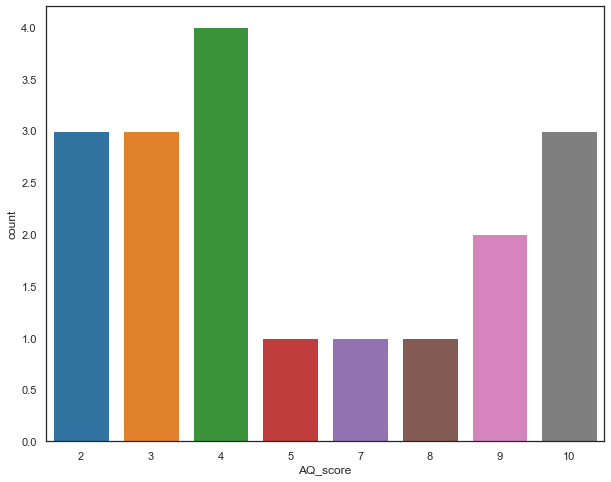

In [18]:
## Scoring
agree = ['AQ_rating_1', 'AQ_rating_7', 'AQ_rating_8', 'AQ_rating_10'] # score of 3 or 4 get a point
disagree = ['AQ_rating_2','AQ_rating_3','AQ_rating_4','AQ_rating_5','AQ_rating_6','AQ_rating_9', ] # score of 1 or 2 get a point]
a = a_dat[agree] >= 3
b = a_dat[disagree] < 3
a_dat['AQ_score'] = a.sum(axis=1) + b.sum(axis=1)
a_dat = a_dat[a_dat.prolific_id.isin(dat.prolific_id.unique().tolist())]

fg, ax = plt.subplots(figsize=(10, 8))
sns.countplot(data=a_dat, x='AQ_score', ax=ax);

In [ ]:
e_dat.groupby('diag').describe()

In [19]:
cdat = dat.loc[dat.correct ==True]
for subject in dat.prolific_id.unique():
    # calculate mean RT for belief ascription
    a_dat.loc[a_dat.prolific_id == subject, 'avg_ThinkRT'] = cdat.loc[(cdat.prolific_id == subject) & (cdat.ascription_type == 'Thinks')].rt_ms.mean()
    a_dat.loc[a_dat.prolific_id == subject, 'avg_KnowRT'] = cdat.loc[(cdat.prolific_id == subject) & (cdat.ascription_type == 'Knows')].rt_ms.mean()

a_dat['RT_diff'] = a_dat.apply(lambda row: row['avg_ThinkRT'] - row['avg_KnowRT'], axis=1)


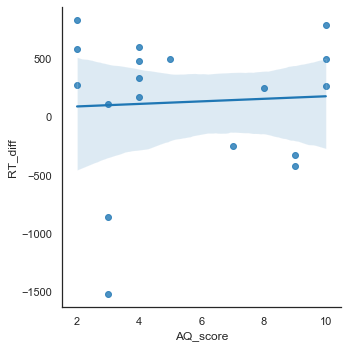

In [20]:
sns.lmplot(x='AQ_score', y='RT_diff', data=a_dat);
